In [190]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.io as pio
sns.set()


In [2]:
from IPython.display import Markdown, display, Image
import numpy as np
import pandas as pd
import random
import math
import dvc.api


In [3]:
from helper import Helper
from app_logger import App_Logger

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
logger = App_Logger("data_exploration.log").get_app_logger()

In [6]:
helper = Helper()

In [7]:
train_df = helper.read_csv("../data/train.csv")
store_df = helper.read_csv("../data/store.csv")
test_df = helper.read_csv("../data/test.csv")

file read as csv
file read as csv
file read as csv


## Data Overview for store data

In [8]:
class DataOverview:
    
    def __init__(self, df):
        
        self.df = df
    
    def read_head(self, top=5):
        return self.df.head(top)
    
    # returning the number of rows columns and column information
    def get_info(self):
        row_count, col_count = self.df.shape
    
        print(f"Number of rows: {row_count}")
        print(f"Number of columns: {col_count}")
        print("================================")

        return (row_count, col_count), self.df.info()
    
    def get_count(self, column_name):
        return pd.DataFrame(self.df[column_name].value_counts())
    
    # getting the null count for every column
    def get_null_count(self, column_name):
        print("Null values count")
        print(self.df.isnull().sum())
        return self.df.isnull().sum()
    
    # getting the percentage of missing values
    def get_percent_missing(self):
        helper = Helper()
        percent_missing = helper.percent_missing(self.df)
        null_percent_df = pd.DataFrame(columns = ['column', 'null_percent'])
        columns = self.df.columns.values.tolist()
        null_percent_df['column'] = columns
        null_percent_df['null_percent'] = null_percent_df['column'].map(lambda x: helper.percent_missing_for_col(self.df, x))
        
        
        return null_percent_df.sort_values(by=['null_percent'], ascending = False), percent_missing
    
    

In [9]:
storeDataOverview = DataOverview(store_df)

In [10]:

display(storeDataOverview.read_head(10))

display(storeDataOverview.get_info())

store_null_df, percent_missing = storeDataOverview.get_percent_missing()
display(store_null_df)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


Number of rows: 1115
Number of columns: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


((1115, 10), None)

,column,null_percent
7,Promo2SinceWeek,48.79
8,Promo2SinceYear,48.79
9,PromoInterval,48.79
4,CompetitionOpenSinceMonth,31.75
5,CompetitionOpenSinceYear,31.75
3,CompetitionDistance,0.27
0,Store,0.00
1,StoreType,0.00
2,Assortment,0.00
6,Promo2,0.00


Write about your observation

In [11]:

display(storeDataOverview.get_count("Promo2SinceYear"))
display(storeDataOverview.get_count("PromoInterval"))


,Promo2SinceYear
2011.0,128
2013.0,120
2014.0,95
2012.0,81
2009.0,73
2010.0,64
2015.0,10


,PromoInterval
"Jan,Apr,Jul,Oct",335
"Feb,May,Aug,Nov",130
"Mar,Jun,Sept,Dec",106


### Null Value handling

In [12]:
store_df[store_df['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [13]:

class clean_store_df:
    
    def __init__(self):
        pass
    
    def handle_missing_value(self, df):
        
        try:
            df['CompetitionDistance'] = df['CompetitionDistance'].fillna(data_store['CompetitionDistance'].median())
            return df
        except:
            pass
             
                                                                                     
                                                                                     

## Data Overview for train data


In [14]:
trainDataOverview = DataOverview(train_df)

In [15]:

display(trainDataOverview.read_head(10))
display(trainDataOverview.get_info())
store_null_df, percent_missing = trainDataOverview.get_percent_missing()
display(store_null_df)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


Number of rows: 1017209
Number of columns: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


((1017209, 9), None)

,column,null_percent
0,Store,0.0
1,DayOfWeek,0.0
2,Date,0.0
3,Sales,0.0
4,Customers,0.0
5,Open,0.0
6,Promo,0.0
7,StateHoliday,0.0
8,SchoolHoliday,0.0


In [16]:

display(trainDataOverview.get_count("StateHoliday"))
display(trainDataOverview.get_count("SchoolHoliday"))
display(trainDataOverview.get_count("Open"))


,StateHoliday
0,855087
0,131072
a,20260
b,6690
c,4100


,SchoolHoliday
0,835488
1,181721


,Open
1,844392
0,172817


In [17]:

display(train_df[train_df["Open"] == 0].sample(5))
display(train_df.query("Open == 0 & Sales > 0"))


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
383395,268,7,2014-07-27,0,0,0,0,0,0
919641,552,5,2013-03-29,0,0,0,1,b,1
351184,878,7,2014-08-31,0,0,0,0,0,0
44713,114,7,2015-06-21,0,0,0,0,0,0
154844,975,7,2015-03-15,0,0,0,0,0,0


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [334]:

class CleanTrainTestData:
    
    def __init__(self):
        pass
    
    def drop_closed_stores(self, df):
        
        try:
            cleaned = df.query("Open == 1")
            return cleaned
        except:
            pass
        
    def convert_to_datatime(self, df):  
        try:
            df['Date'] = pd.to_datetime(train_df['Date'])
            return df
        except:
            pass
    
    def sort_by_date(self, df):
        return df.sort_values(by=["Date"], ascending=False)
    
    def to_str(self, df):
        df['StateHoliday'] = df['StateHoliday'].astype(str)
        return df
        
    def transform_date(self, df):
        
        df['Date'] = pd.to_datetime(df['Date'])
        df['Year'] = pd.DatetimeIndex(df['Date']).year
        df['Month'] = pd.DatetimeIndex(df['Date']).month
        df['Day'] = pd.DatetimeIndex(df['Date']).day
        return df
    

    




In [335]:
## Handling outliers

In [336]:

cleaner = CleanTrainTestData()
cleaned_train_df = cleaner.transform_date(train_df)
cleaned_train_df = cleaner.sort_by_date(cleaned_train_df)
# cleaned_train_df = cleaner.drop_closed_stores(cleaned_train_df)
cleaned_train_df = cleaner.to_str(cleaned_train_df)


display(cleaned_train_df)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
742,743,5,2015-07-31,5085,501,1,1,0,1,2015,7,31
748,749,5,2015-07-31,6612,716,1,1,0,1,2015,7,31
747,748,5,2015-07-31,7481,578,1,1,0,1,2015,7,31
746,747,5,2015-07-31,10708,826,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1016471,377,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016472,378,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016473,379,2,2013-01-01,0,0,0,0,a,1,2013,1,1
1016474,380,2,2013-01-01,0,0,0,0,a,1,2013,1,1


In [337]:

merged_df = pd.merge(cleaned_train_df, store_df, on="Store")


In [338]:
store_a = merged_df[merged_df["StoreType"] == "a"]
store_b = merged_df[merged_df["StoreType"] == "b"]
store_c = merged_df[merged_df["StoreType"] == "c"]
store_d = merged_df[merged_df["StoreType"] == "d"]


store_a_month_agg = store_a.groupby("Month").agg({"Sales": "sum"}).rename(columns={"Sales": "Store-A Sales"})
store_b_month_agg = store_b.groupby("Month").agg({"Sales": "sum"}).rename(columns={"Sales": "Store-B Sales"})
store_c_month_agg = store_c.groupby("Month").agg({"Sales": "sum"}).rename(columns={"Sales": "Store-C Sales"})
store_d_month_agg = store_d.groupby("Month").agg({"Sales": "sum"}).rename(columns={"Sales": "Store-D Sales"})

store_sales_month = pd.merge(store_a_month_agg, store_b_month_agg, on="Month")
store_sales_month = pd.merge(store_sales_month, store_c_month_agg, on="Month")
store_sales_month = pd.merge(store_sales_month, store_d_month_agg, on="Month")

display(store_sales_month)

fig = px.line(store_sales_month, x=store_sales_month.index, y=["Store-A Sales", "Store-B Sales",
                                                              "Store-C Sales", "Store-D Sales"])
fig.show()



,Store-A Sales,Store-B Sales,Store-C Sales,Store-D Sales
Month,,,,
1,304576406,14335394,74586663,173230261
2,284545471,13754300,69631800,160802839
3,321863327,15558123,78800324,183610132
4,309808014,15449053,75371225,175267003
5,303388388,16537057,74725937,174596835
6,310104413,15844796,74962664,177200902
7,322031387,15772162,79115030,178140626
8,196876022,9748097,49239042,105928041
9,186955602,9626263,46188827,99799439


In [339]:
store_a = merged_df[merged_df["StoreType"] == "a"]
store_b = merged_df[merged_df["StoreType"] == "b"]
store_c = merged_df[merged_df["StoreType"] == "c"]
store_d = merged_df[merged_df["StoreType"] == "d"]


store_a_month_agg = store_a.groupby("Year").agg({"Sales": "sum"}).rename(columns={"Sales": "Store-A Sales"})
store_b_month_agg = store_b.groupby("Year").agg({"Sales": "sum"}).rename(columns={"Sales": "Store-B Sales"})
store_c_month_agg = store_c.groupby("Year").agg({"Sales": "sum"}).rename(columns={"Sales": "Store-C Sales"})
store_d_month_agg = store_d.groupby("Year").agg({"Sales": "sum"}).rename(columns={"Sales": "Store-D Sales"})

store_sales_month = pd.merge(store_a_month_agg, store_b_month_agg, on="Year")
store_sales_month = pd.merge(store_sales_month, store_c_month_agg, on="Year")
store_sales_month = pd.merge(store_sales_month, store_d_month_agg, on="Year")
display(store_sales_month)

fig = px.line(store_sales_month, x=store_sales_month.index.astype("str"), y=["Store-A Sales", "Store-B Sales",
                                                              "Store-C Sales", "Store-D Sales"])
fig.show()

,Store-A Sales,Store-B Sales,Store-C Sales,Store-D Sales
Year,,,,
2013,1246063027,57966559,304755298,694091200
2014,1181741424,62615162,296773142,639675168
2015,737530408,38649674,181692986,431626575


In [340]:
store_b = merged_df[merged_df["StoreType"] == "b"]

temp = store_b.groupby("Month").agg({"Sales": "mean"})
fig = px.line(temp, x=temp.index, y="Sales")
fig.show()

In [341]:
store_c = merged_df[merged_df["StoreType"] == "c"]

temp = store_c.groupby("Month").agg({"Sales": "mean"})
fig = px.line(temp, x=temp.index, y="Sales")
fig.show()

In [167]:
store_d = merged_df[merged_df["StoreType"] == "d"]

temp = store_d.groupby("Month").agg({"Sales": "mean"})
fig = px.line(temp, x=temp.index, y=["Sales", "Sales"])
fig.show()

In [24]:
df_2013 =  cleaned_train_df[cleaned_train_df['Year'] == 2013]
df_2014 =  cleaned_train_df[cleaned_train_df['Year'] == 2014]
df_2015 =  cleaned_train_df[cleaned_train_df['Year'] == 2015]

In [25]:
xmass_date_13 = pd.to_datetime("2013-12-25")

before_xmass = df_2013.query("Day >= 10 & Day <=20 & Month == 12 ").groupby("Date").agg({"Sales": "mean"})
during_xmass = df_2013.query("Day >= 20 & Day <=30 & Month == 12 ").groupby("Date").agg({"Sales": "mean"})
after_xmass = df_2014.query("Day >= 1 & Day <=10 & Month == 1").groupby("Date").agg({"Sales": "mean"})



fig = px.line(during_xmass, x=during_xmass.index, y="Sales")
fig.show()





In [26]:
cleaned_train_df[["Date", "Sales", "Customers"]]

,Date,Sales,Customers
0,2015-07-31,5263,555
742,2015-07-31,5085,501
748,2015-07-31,6612,716
747,2015-07-31,7481,578
746,2015-07-31,10708,826
...,...,...,...
1016624,2013-01-01,2907,532
1016588,2013-01-01,3113,527
1016606,2013-01-01,2646,625
1016429,2013-01-01,2401,482


,Sales,Customers
Sales,1.000000,0.823597
Customers,0.823597,1.000000


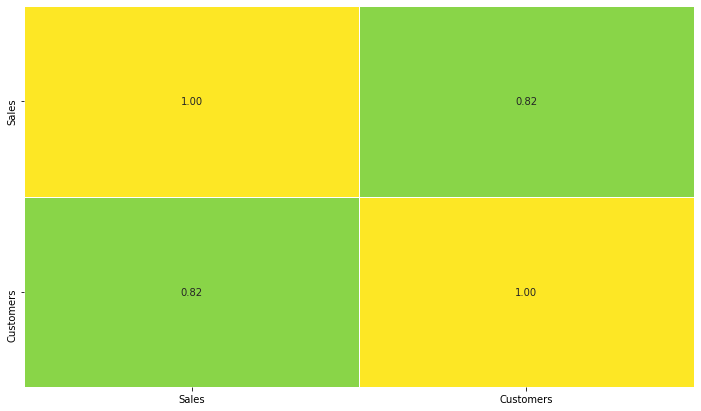

In [122]:
# fig = px.scatter(cleaned_train_df, x="Customers", y="Sales")
# fig.show()
plt.figure(figsize=(12, 7))
display(sales_customers_corr)

sales_customers_corr = cleaned_train_df[["Sales", "Customers"]].corr()
sns.heatmap(sales_customers_corr, annot=True)
plt.show()


In [66]:
import plotly.graph_objects as go
fig = go.Figure()

promo_sales = merged_df[merged_df.Promo == 1]
non_promo_sales = merged_df[merged_df.Promo == 0]

promo_sales_agg = promo_sales.groupby("Month").agg({"Sales":  "mean"})
promo_sales_agg = promo_sales_agg.rename(columns={"Sales": "Avg Promotion Sales"})

non_promo_sales_agg = non_promo_sales.groupby("Month").agg({"Sales":  "mean"})
non_promo_sales_agg = non_promo_sales_agg.rename(columns={"Sales": "Avg Non-Promotion Sales"})


pormo_sales_df = pd.merge(promo_sales_agg, non_promo_sales_agg, on="Month")

fig.add_trace(go.Scatter(x=pormo_sales_df.index, y=pormo_sales_df['Avg Promotion Sales'],
                    mode='lines+markers',
                    name='Promotion Sales'))
fig.add_trace(go.Scatter(x=pormo_sales_df.index,y=pormo_sales_df['Avg Non-Promotion Sales'],
                    mode='lines+markers',
                    name='Non Promotion Sales'))
fig.show()

display(pormo_sales_df)

,Avg Promotion Sales,Avg Non-Promotion Sales
Month,,
1,7782.800277,5591.904236
2,7772.909263,5747.812834
3,8252.983345,5805.723545
4,8426.029528,5855.305439
5,8087.946860,6300.749699
6,8508.684577,5871.747172
7,8257.588809,5751.911514
8,7926.496229,5680.220869
9,7916.399032,5528.634084


In [111]:
fig = go.Figure()

a_assortment_df = merged_df[merged_df.Assortment == 'a']
b_assortment_df = merged_df[merged_df.Assortment == 'b']
c_assortment_df = merged_df[merged_df.Assortment == 'c']

a_sales_agg = a_assortment_df.groupby("Month").agg({"Sales":  "mean"})
a_sales_agg = a_sales_agg.rename(columns={"Sales": "A-type assortment sales"})

b_sales_agg = b_assortment_df.groupby("Month").agg({"Sales":  "mean"})
b_sales_agg = b_sales_agg.rename(columns={"Sales": "B-type assortment sales"})

c_sales_agg = c_assortment_df.groupby("Month").agg({"Sales":  "mean"})
c_sales_agg = c_sales_agg.rename(columns={"Sales": "C-type assortment sales"})

assortment_sales = pd.merge(a_sales_agg, b_sales_agg, on="Month")
assortment_sales = pd.merge(assortment_sales, c_sales_agg, on="Month")


display(assortment_sales)


fig.add_trace(go.Scatter(x=assortment_sales.index, y=assortment_sales['A-type assortment sales'],
                    mode='lines+markers',
                    name='A-type assortment sales'))

fig.add_trace(go.Scatter(x=assortment_sales.index,y=assortment_sales['B-type assortment sales'],
                    mode='lines+markers',
                    name='B-type assortment sales'))

fig.add_trace(go.Scatter(x=assortment_sales.index,y=assortment_sales['C-type assortment sales'],
                    mode='lines+markers',
                    name='C-type assortment sales'))
fig.show()



,A-type assortment sales,B-type assortment sales,C-type assortment sales
Month,,,
1,6298.498704,7580.068293,6850.096021
2,6299.317702,8279.352703,6891.021259
3,6646.173581,8582.962594,7324.909116
4,6738.367566,8727.935930,7366.195527
5,6775.956707,9131.075269,7440.756410
6,6675.527677,8999.653086,7332.085144
7,6595.588953,8852.003722,7315.012865
8,6243.296228,7949.796964,7071.430700
9,6243.884974,8254.686275,6846.233865


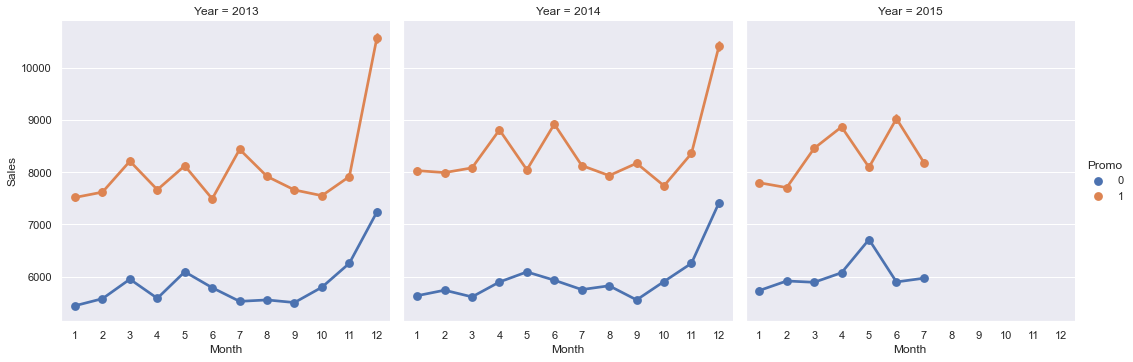

In [192]:
sns.factorplot(data = cleaned_train_df, x ="Month", y = "Sales", 
               col = 'Year', # per store type in cols
               hue = 'Promo')

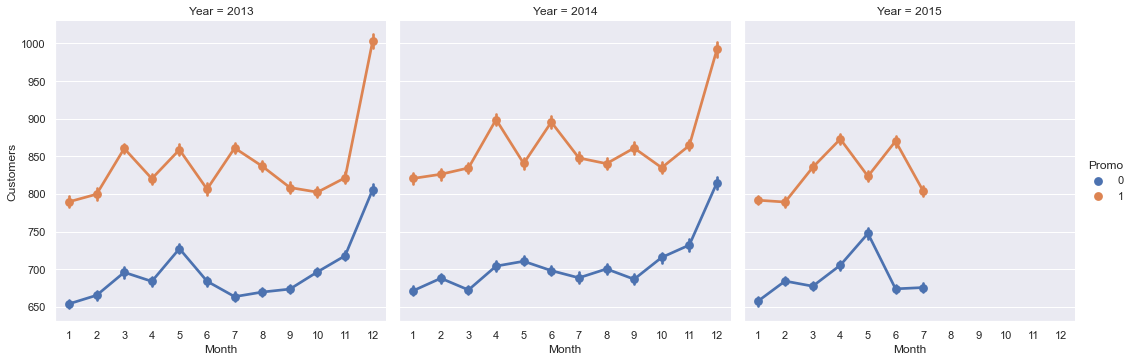

In [191]:
sns.factorplot(data = cleaned_train_df, x ="Month", y = "Customers", 
               col = 'Year', # per store type in cols
               hue = 'Promo')

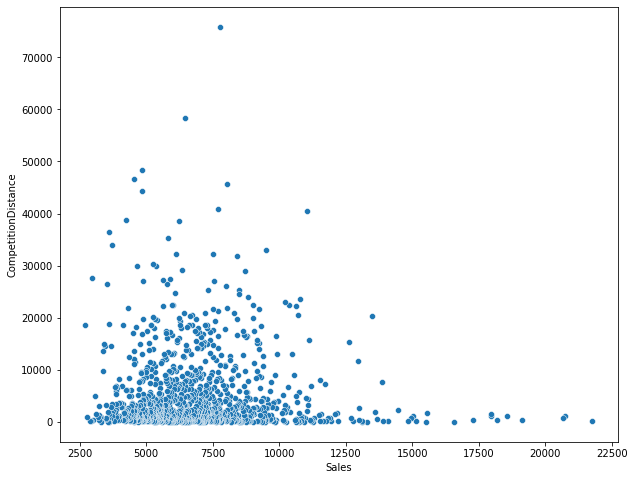

In [133]:

competition_sales = merged_df[["Store", "CompetitionDistance", "Sales"]].groupby("Store").agg({"Sales": "mean",
                                                                           "CompetitionDistance": "max"})

competition_sales = competition_sales.sort_values(by="Sales", ascending=False)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=competition_sales[['Sales', "CompetitionDistance"]], x="Sales",
                y="CompetitionDistance")

plt.show()


,Sales,CompetitionDistance
Sales,1.000000,-0.042431
CompetitionDistance,-0.042431,1.000000


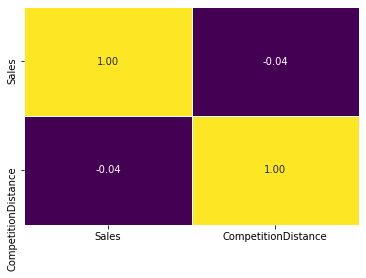

In [125]:
competition_sales_corr = competition_sales[['Sales', 'CompetitionDistance']].corr()
display(competition_sales_corr)
sns.heatmap(competition_sales_corr, annot=True, cmap='viridis', vmin=0,
                vmax=1, fmt='.2f', linewidths=.7, cbar=False)
plt.show()

In [135]:
fig = px.scatter(competition_sales, x="Sales", y="CompetitionDistance")
fig.show()


### 1

In [342]:
import plots

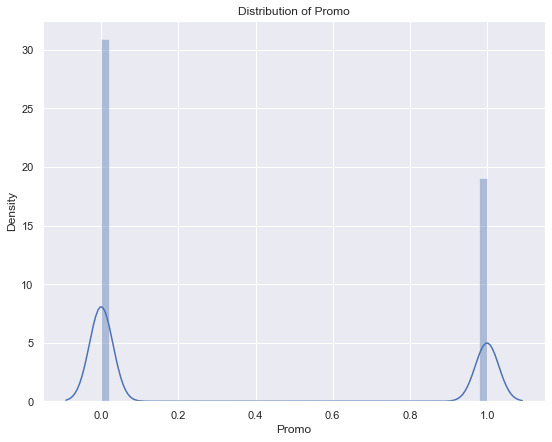

In [343]:
plt.figure(figsize=(9, 7))
sns.distplot(train_df['Promo']).set_title(f'Distribution of Promo')
plt.show()


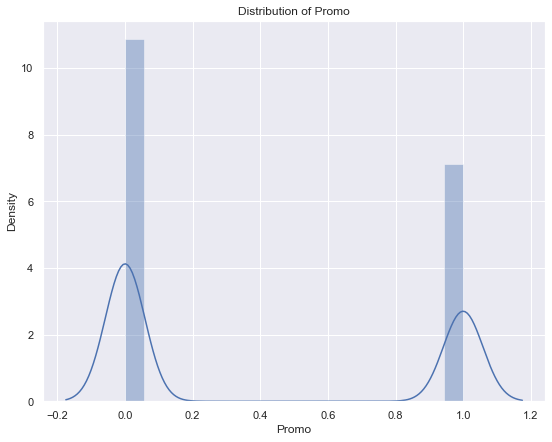

In [344]:
plt.figure(figsize=(9, 7))
sns.distplot(test_df['Promo']).set_title(f'Distribution of Promo')
plt.show()

## 2

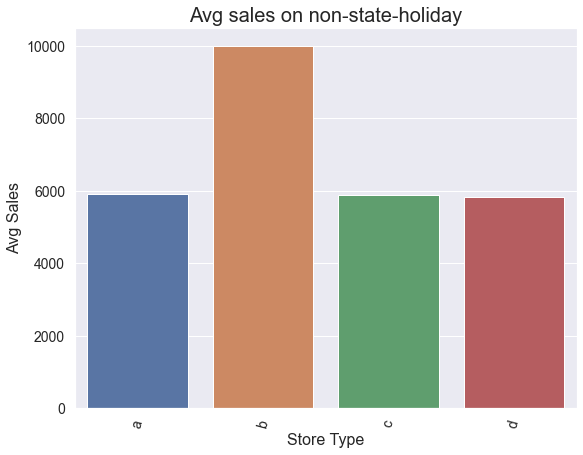

,Sales
StoreType,
a,5914.561455
b,10006.401184
c,5895.925187
d,5822.314382


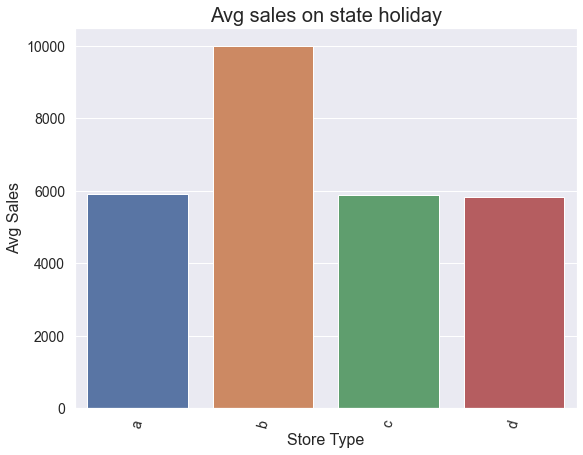

,Sales
StoreType,
a,5914.561455
b,10006.401184
c,5895.925187
d,5822.314382


In [345]:
no_state_holday = merged_df.query("not (StateHoliday != 0 & StateHoliday != '0')")
state_holday_df = merged_df.query("StateHoliday == 0 | StateHoliday == '0'")

no_state_holiday_agg = no_state_holday.groupby("StoreType").agg({"Sales": "mean"})
state_holday_df_agg = state_holday_df.groupby("StoreType").agg({"Sales": "mean"})



plots.plot_bar(no_state_holiday_agg, no_state_holiday_agg.index, "Sales", "Avg sales on non-state-holiday",
               "Store Type", "Avg Sales")
display(no_state_holiday_agg)

plots.plot_bar(state_holday_df_agg, state_holday_df_agg.index, "Sales", "Avg sales on state holiday",
               "Store Type", "Avg Sales")
display(state_holday_df_agg)


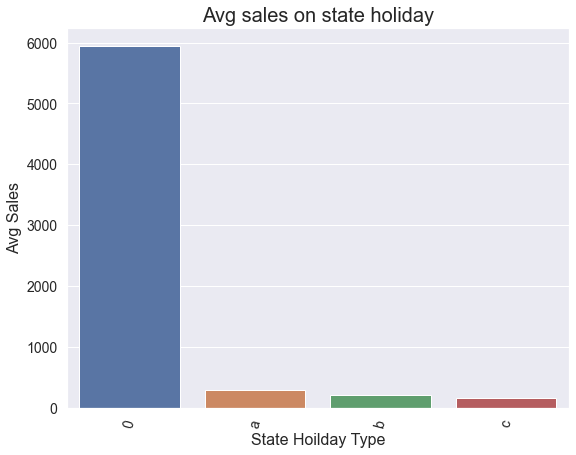

In [347]:


state_hoilday_comparsion = cleaned_train_df.groupby("StateHoliday").agg({"Sales": "mean"})

plots.plot_bar(state_hoilday_comparsion, state_hoilday_comparsion.index, "Sales", "Avg sales on state holiday",
               "State Hoilday Type", "Avg Sales")


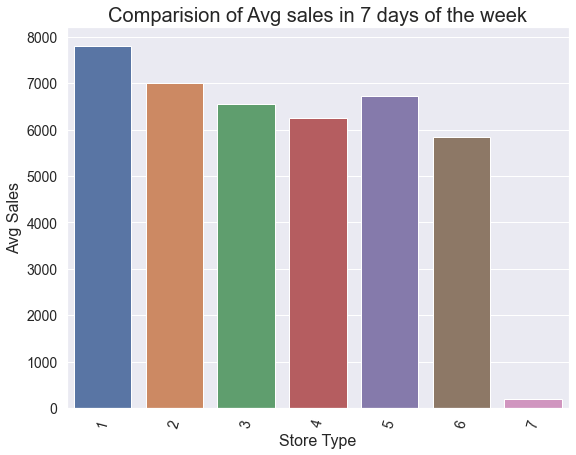

In [348]:

day_map = {1: "Mon", 2: "Tue", 3: "Wed", 4:"Thur", 5: "Fri", 6:"Sat", 7:"Sun"}

day_agg = merged_df.groupby("DayOfWeek").agg({"Sales": "mean"})



plots.plot_bar(day_agg, day_agg.index, "Sales", "Comparision of Avg sales in 7 days of the week",
               "Store Type", "Avg Sales")



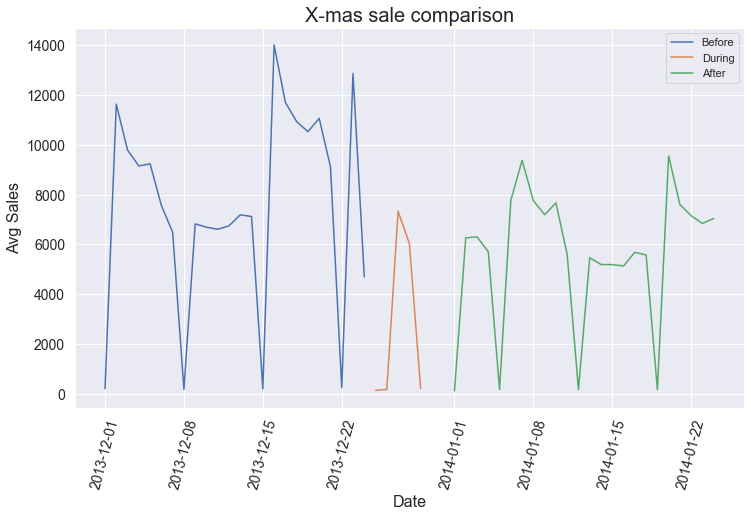

In [349]:

before_index = (train_df["Date"] >= pd.to_datetime("2013-12-01")) & (train_df["Date"] < pd.to_datetime("2013-12-25"))
before_xmass = train_df[before_index].groupby("Date").agg({"Sales": "mean"})

during_index = (train_df["Date"] >= pd.to_datetime("2013-12-25")) & (train_df["Date"] < pd.to_datetime("2013-12-30"))
during_xmass = train_df[during_index].groupby("Date").agg({"Sales": "mean"})

after_index = (train_df["Date"] >= pd.to_datetime("2014-01-01")) & (train_df["Date"] < pd.to_datetime("2014-1-25"))
after_xmass = train_df[after_index].groupby("Date").agg({"Sales": "mean"})


plt.figure(figsize=(12, 7))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After')

plt.title("X-mas sale comparison", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.show()


In [ ]:
##